# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = ["imperial"]

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

test = requests.get(query_url + 'saskylakh').json()
test

{'coord': {'lon': 114.0833, 'lat': 71.9167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 266.52,
  'feels_like': 266.52,
  'temp_min': 266.52,
  'temp_max': 266.52,
  'pressure': 999,
  'humidity': 97,
  'sea_level': 999,
  'grnd_level': 998},
 'visibility': 303,
 'wind': {'speed': 0.71, 'deg': 48, 'gust': 0.77},
 'clouds': {'all': 100},
 'dt': 1634603851,
 'sys': {'country': 'RU', 'sunrise': 1634601936, 'sunset': 1634631084},
 'timezone': 32400,
 'id': 2017155,
 'name': 'Saskylakh',
 'cod': 200}

In [5]:
# set up lists to hold reponse info
latitude = []
longitude = []
temp = []
humidity = []
cloudiness = []
windspeed = []
city_name = []
country = []

print(f'Beginning Data Retrieval')
print(f'------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        time.sleep(1)
        response = requests.get(query_url + city).json()
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        print(f'Loaded data for city: {city}')
        
    except: 
        print(f'City not found: {city}')
        pass


Beginning Data Retrieval
------------------------
Loaded data for city: georgetown
Loaded data for city: schattdorf
Loaded data for city: dikson
Loaded data for city: fort wellington
Loaded data for city: namibe
Loaded data for city: vaini
Loaded data for city: maragogi
Loaded data for city: atuona
City not found: amderma
Loaded data for city: khatanga
Loaded data for city: ushuaia
Loaded data for city: tuktoyaktuk
Loaded data for city: sao raimundo das mangabeiras
City not found: grand river south east
Loaded data for city: barrow
Loaded data for city: jamestown
Loaded data for city: bilibino
Loaded data for city: bredasdorp
Loaded data for city: hofn
Loaded data for city: alofi
Loaded data for city: bubaque
Loaded data for city: zaria
Loaded data for city: ormond beach
Loaded data for city: port elizabeth
Loaded data for city: bonthe
Loaded data for city: half moon bay
Loaded data for city: bonavista
City not found: taolanaro
Loaded data for city: hobart
Loaded data for city: turukha

Loaded data for city: reconquista
Loaded data for city: borogontsy
Loaded data for city: hervey bay
Loaded data for city: igurusi
City not found: sorvag
Loaded data for city: seoul
Loaded data for city: suraabad
Loaded data for city: kirakira
Loaded data for city: tura
Loaded data for city: okhotsk
Loaded data for city: saint george
Loaded data for city: hobyo
Loaded data for city: royan
Loaded data for city: kapit
Loaded data for city: natal
Loaded data for city: joshimath
Loaded data for city: yuci
Loaded data for city: binzhou
Loaded data for city: krishnanagar
Loaded data for city: bambous virieux
Loaded data for city: brae
Loaded data for city: rio gallegos
Loaded data for city: amvrosiyivka
Loaded data for city: grand gaube
Loaded data for city: kalmunai
Loaded data for city: malm
Loaded data for city: broska
Loaded data for city: puerto lempira
Loaded data for city: leningradskiy
Loaded data for city: stephenville
Loaded data for city: masaguisi
Loaded data for city: pavlivka
Lo

Loaded data for city: baghdad
Loaded data for city: zolotyy potik
Loaded data for city: aripuana
Loaded data for city: sao joao batista
Loaded data for city: biak
Loaded data for city: dawson
Loaded data for city: camacha
Loaded data for city: charters towers
Loaded data for city: fangshan
Loaded data for city: pendleton
Loaded data for city: huilong
Loaded data for city: alyangula
Loaded data for city: gandajika
Loaded data for city: takoradi
Loaded data for city: lorengau
Loaded data for city: kismayo
Loaded data for city: juneau
Loaded data for city: isangel
Loaded data for city: hitachi
Loaded data for city: kargil
Loaded data for city: ukiah
Loaded data for city: kongwa
City not found: tarudant
Loaded data for city: berlevag
Loaded data for city: talmenka
Loaded data for city: hatillo
Loaded data for city: ramgarh
City not found: sedelnikovo
Loaded data for city: lagunas
Loaded data for city: orotukan
City not found: kamenskoye
Loaded data for city: store heddinge
Loaded data for 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
    "Country": country
}

weather_data = pd.DataFrame(weather_dict)
weather_data


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country
0,George Town,5.4112,100.3354,299.00,90,40,1.34,MY
1,Schattdorf,46.8655,8.6547,281.25,48,99,1.73,CH
2,Dikson,73.5069,80.5464,270.84,94,100,11.57,RU
3,Catherinas Lust,6.4000,-57.6000,299.60,82,64,3.69,GY
4,Mossamedes,-15.1961,12.1522,290.47,86,60,0.35,AO
...,...,...,...,...,...,...,...,...
560,Acaraú,-2.8856,-40.1200,299.55,84,71,7.10,BR
561,Savinka,50.0785,47.0994,279.62,70,97,3.15,RU
562,Cayenne,4.9333,-52.3333,299.87,85,90,0.00,GF
563,Brazzaville,-4.2658,15.2832,298.35,78,100,2.57,CG


In [8]:
weather_data.to_csv('Weather_Data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humid = weather_data.loc[weather_data['Humidity'] > 100, :]
high_humid

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# no cities with humidity over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature v Latitude 10/18/2021')

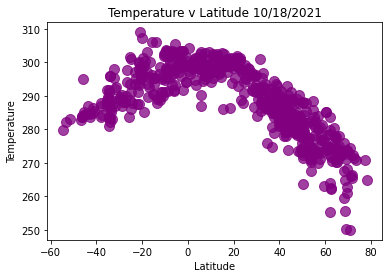

In [14]:
latitude = weather_data["Latitude"]
temp = weather_data["Temperature"]

plt.scatter(latitude, temp, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature v Latitude 10/18/2021")


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity v Latitude 10/18/2021')

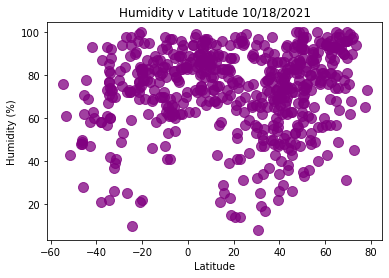

In [15]:
humid = weather_data["Humidity"]

plt.scatter(latitude, humid, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity v Latitude 10/18/2021")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness v Latitude 10/18/2021')

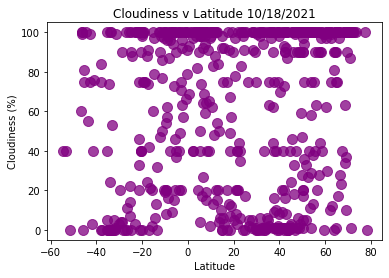

In [16]:
cloud = weather_data["Cloudiness"]

#scatter plot for cloudiness
plt.scatter(latitude, cloud, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness v Latitude 10/18/2021")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed Latitude 10/18/2021')

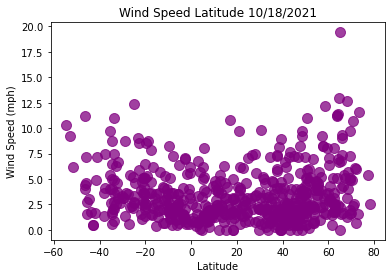

In [17]:
wind_speed = weather_data["Windspeed"]

#scatter plot for wind speed
plt.scatter(latitude, wind_speed, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed Latitude 10/18/2021")

## Linear Regression

In [18]:
north = weather_data.loc[weather_data['Latitude'] >= 0.00]
north_lat = north["Latitude"]

south = weather_data.loc[weather_data['Latitude'] <= 0.00]
south_lat = south["Latitude"]

north

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country
0,George Town,5.4112,100.3354,299.00,90,40,1.34,MY
1,Schattdorf,46.8655,8.6547,281.25,48,99,1.73,CH
2,Dikson,73.5069,80.5464,270.84,94,100,11.57,RU
3,Catherinas Lust,6.4000,-57.6000,299.60,82,64,3.69,GY
8,Khatanga,71.9667,102.5000,272.36,98,100,6.03,RU
...,...,...,...,...,...,...,...,...
557,Tomatlán,19.9333,-105.2500,299.15,88,5,1.95,MX
559,Fallon,39.4735,-118.7774,283.49,47,75,3.60,US
561,Savinka,50.0785,47.0994,279.62,70,97,3.15,RU
562,Cayenne,4.9333,-52.3333,299.87,85,90,0.00,GF


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Temperature v Latitude 10/18/2021')

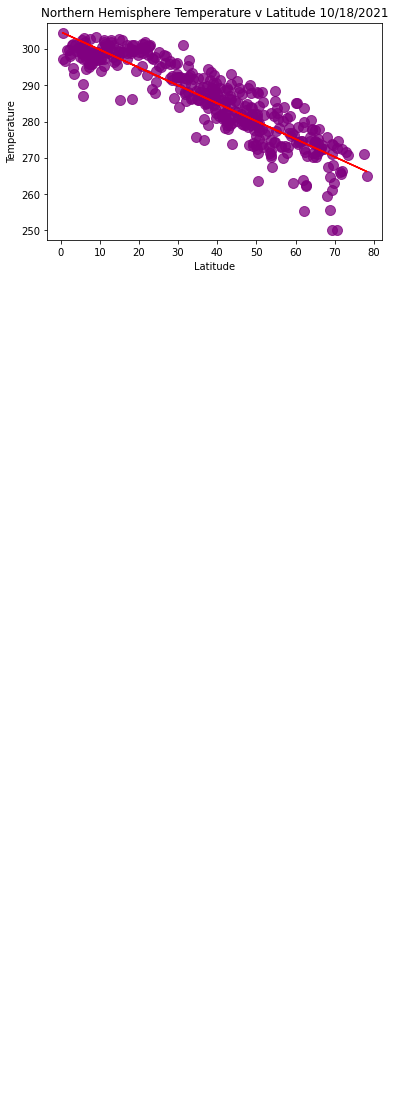

In [19]:
north_temp = north["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_temp, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere Temperature v Latitude 10/18/2021")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Temperature v Latitude 10/18/2021')

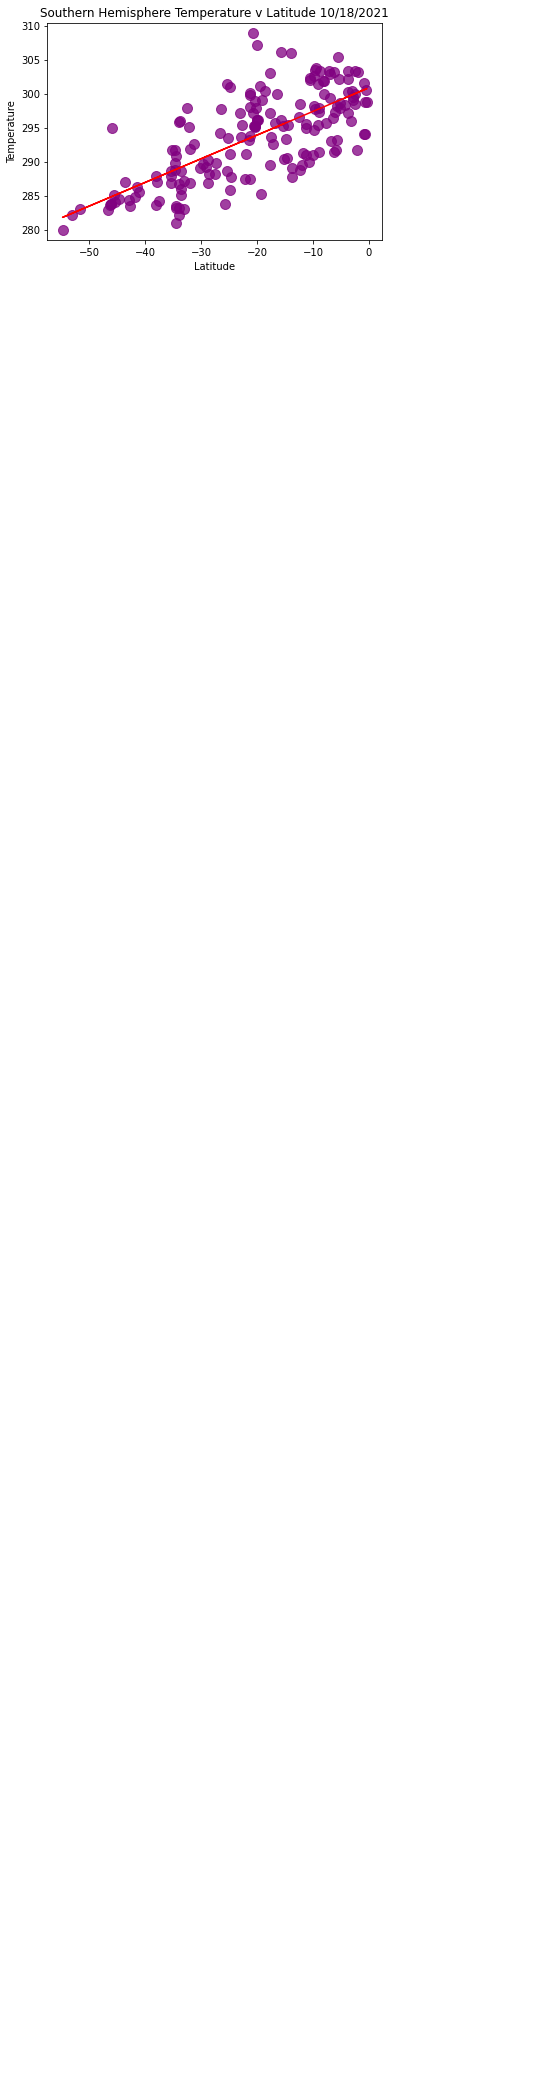

In [20]:
south_temp = south["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
             
plt.scatter(south_lat, south_temp, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere Temperature v Latitude 10/18/2021")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Humidity v Latitude 10/18/2021')

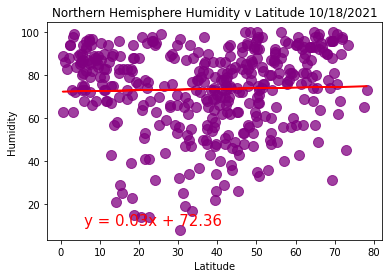

In [21]:
north_humid = north["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_humid, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Humidity v Latitude 10/18/2021")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Humidity v Latitude 10/18/2021')

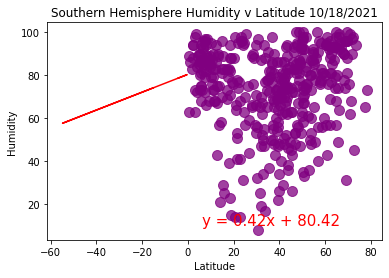

In [22]:
south_humid = south["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values =  south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_humid, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Humidity v Latitude 10/18/2021")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Cloudiness v Latitude 10/18/2021')

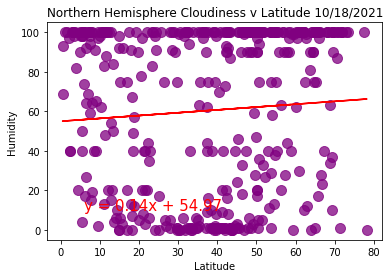

In [23]:
north_clouds = north["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_clouds)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_clouds, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Cloudiness v Latitude 10/18/2021")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Cloudiness v Latitude 10/18/2021')

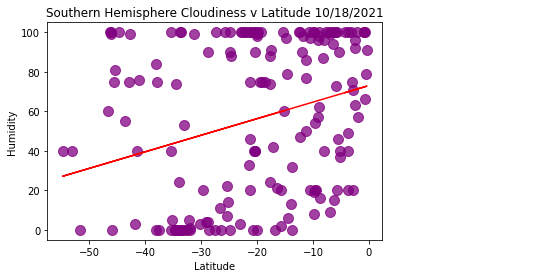

In [24]:
south_clouds = south["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_clouds)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(south_lat, south_clouds, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Cloudiness v Latitude 10/18/2021")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Windspeed v Latitude 10/18/2021')

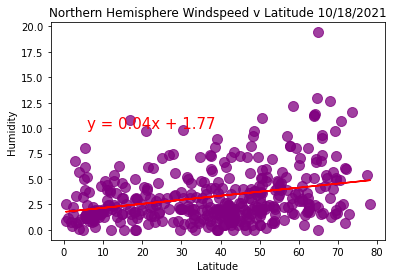

In [25]:
north_wind = north["Windspeed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_wind, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Windspeed v Latitude 10/18/2021")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Windspeed v Latitude 10/18/2021')

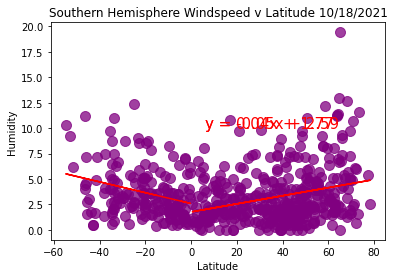

In [26]:
south_wind = south["Windspeed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_wind, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Windspeed v Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(south_lat, south_wind, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Windspeed v Latitude 10/18/2021")